# Exploratory Data Analysis
We are going to perform an exploratory analysis on the scrapped `Urgent10k` data to gain some insight about the data.

Feature information
-----
- `reviewId`- Unique identification key per review
- `userName`- customer username
- `userImage`- urrl to customer display picture
- `reviews`- customer review 
- `score`- customer star rating
- `thumbsUpCount`- total number of like per reviews
- `reviewCreatedVersion`- customer app version as of the time of review
- `at`- date and time review was posted.
- `replyContent`- reply content per customer review
- `repliedAt`- date and time of reply per customer review

In [1]:
# Import neccessary libraries
import pandas as pd
import seaborn as sns
from scipy.stats import expon
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Urgent10k_scraped_reviews.csv", encoding="ISO-8859-1")
df.head()

,reviewId,userName,userImage,reviews,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,24a23f74-13ce-4bbe-a578-00aa7501ed5c,Anivungu Barnabas,https://play-lh.googleusercontent.com/a-/ACB-R...,"Please, i download this app, i processed every...",1,0,1.9,2023-03-19 17:08:09,"Hi, can you please send us your account detail...",2023-03-19 22:20:55
1,d73b3e41-88e0-49e7-af41-1632bcef9102,shawn keen,https://play-lh.googleusercontent.com/a-/ACB-R...,the app is thrash. keeps telling me my app is ...,1,0,1.9,2023-03-19 16:22:20,"Hi, please email us a screenshot of the error ...",2023-03-19 22:22:54
2,69a7114e-a4e8-462a-8e8b-33eec4bd1e05,Chijioke Benneth,https://play-lh.googleusercontent.com/a-/ACB-R...,Well urgent10k is fast and easy to go well don...,3,0,1.9,2023-03-19 13:50:11,We appreciate the feedback! Please let us know...,2023-03-19 22:22:23
3,5c1a8902-719e-43b1-b8d4-55416f7510b8,Nwosu Sunday,https://play-lh.googleusercontent.com/a-/ACB-R...,Trash,1,0,1.9,2023-03-19 07:52:41,"Hi, we are always looking to improve the exper...",2023-03-19 22:22:04
4,16a564b7-caa1-4d93-815c-b90f36f6d299,Nuhu Nganjiwa,https://play-lh.googleusercontent.com/a-/ACB-R...,Awesome app,5,0,1.9,2023-03-19 07:48:12,Thank you very much. Keep using our app :),2023-03-19 22:21:33


In [3]:
# drop unneccessary columns
df = df.drop(columns=["reviewId", "userImage"], axis=0)
df.head()

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Anivungu Barnabas,"Please, i download this app, i processed every...",1,0,1.9,2023-03-19 17:08:09,"Hi, can you please send us your account detail...",2023-03-19 22:20:55
1,shawn keen,the app is thrash. keeps telling me my app is ...,1,0,1.9,2023-03-19 16:22:20,"Hi, please email us a screenshot of the error ...",2023-03-19 22:22:54
2,Chijioke Benneth,Well urgent10k is fast and easy to go well don...,3,0,1.9,2023-03-19 13:50:11,We appreciate the feedback! Please let us know...,2023-03-19 22:22:23
3,Nwosu Sunday,Trash,1,0,1.9,2023-03-19 07:52:41,"Hi, we are always looking to improve the exper...",2023-03-19 22:22:04
4,Nuhu Nganjiwa,Awesome app,5,0,1.9,2023-03-19 07:48:12,Thank you very much. Keep using our app :),2023-03-19 22:21:33


In [4]:
#  check for duplicates
df.duplicated().sum()

0

In [5]:
df.shape

(241, 8)

- the dataset contain 241 unique customers reviews

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              241 non-null    object 
 1   reviews               241 non-null    object 
 2   score                 241 non-null    int64  
 3   thumbsUpCount         241 non-null    int64  
 4   reviewCreatedVersion  206 non-null    float64
 5   at                    241 non-null    object 
 6   replyContent          148 non-null    object 
 7   repliedAt             148 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 15.2+ KB


In [7]:
df.describe()

,score,thumbsUpCount,reviewCreatedVersion
count,241.000000,241.000000,206.000000
mean,3.248963,2.033195,1.582039
std,1.754829,6.769950,0.167092
min,1.000000,0.000000,1.100000
25%,1.000000,0.000000,1.500000
50%,4.000000,0.000000,1.600000
75%,5.000000,1.000000,1.600000
max,5.000000,56.000000,1.900000


In [8]:
# check for null cells
df.isnull().sum()

userName                 0
reviews                  0
score                    0
thumbsUpCount            0
reviewCreatedVersion    35
at                       0
replyContent            93
repliedAt               93
dtype: int64

In [9]:
# evaluate the star ratings distribution
ratings = df["score"].value_counts()
ratings

5    101
1     76
4     28
3     18
2     18
Name: score, dtype: int64

* there is higher percentage of 5 stars rating 
* but closely follow by 1 star rating

This will require further investigation

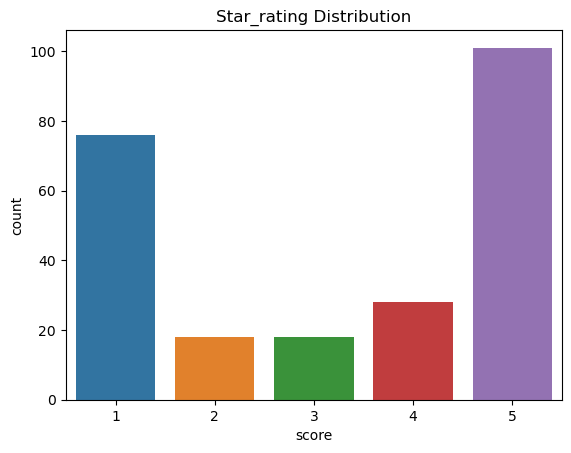

In [10]:
# Display the star rating distribution
sns.countplot(x=df["score"])
plt.title("Star_rating Distribution")
plt.show()

In [11]:
# calculate the reviews with the highest number of likes
df["thumbsUpCount"].value_counts()

0     177
1      24
2      12
7       3
3       3
4       3
11      2
10      2
16      2
19      2
32      1
56      1
25      1
15      1
35      1
41      1
8       1
34      1
5       1
9       1
28      1
Name: thumbsUpCount, dtype: int64

* there were 177 customers' reviews with 0 like
* there was one customer review with 56 likes
* and another review with 41 likes

In [12]:
# let's examine top reviews people liked the most

df_filtered = df[["userName", "reviews", "score", "thumbsUpCount", "reviewCreatedVersion", "replyContent" ]]
df_sorted = df_filtered.sort_values("thumbsUpCount", ascending = False)
df_sorted[df_sorted["thumbsUpCount"] > 20]

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,replyContent
229,Tope Fawehinmi,Seriously I think it a waste of time I apply f...,1,56,1.1,Hi Tope Fawehinmi we apologize for the inconve...
109,Faven Dautur,The app looks promising but it is a wack. don'...,1,41,1.6,NaN
101,Godsent Ubhi,Password working until one day it says invalid...,1,35,1.6,We regret the inconvenience you had to face. F...
66,stephen Ihiene C. Oduh,What a horrible app! How I wish I had listen t...,1,34,1.6,NaN
231,AMARACHI NWACHUKWU,This is fraudulent act. After filling all my d...,1,32,NaN,We apologise for the inconvenience caused kind...
237,Olaniyi Peter,The app is false it's not functioning I just d...,1,28,1.1,"Hi Olaniyi,\nYour reveiw is false. We do give ..."
224,Greg Ovini,I can't register why? The app gave me an error...,1,25,1.4,NaN


* It can be observed that reviews that have the most likes have low star rating `score`
* we will closely examine the top 3 most liked comment to gain more insights 

In [13]:
# the most liked review
most_liked = df_sorted.iloc[0]["reviews"]
most_liked

'Seriously I think it a waste of time I apply for a loan on November 17 2021 it was approved in November 29 2021 after how many days I just saw the mail today only for me to go to the app and access the loan I see that it as been revised again really very bad the finest part is you will be chatting them or sending mails to them they will not reply you'

In [14]:
# the second most liked review
second_ml = df_sorted.iloc[1]["reviews"]
second_ml

"The app looks promising but it is a wack. don't waste your data downloading because it is useless. Applied for a loan and it keep showing pending application for past hours"

In [15]:
# the third most liked review
third_ml = df_sorted.iloc[2]["reviews"]
third_ml

"Password working until one day it says invalid credentials, I did the forgot password, changed it and immediately it said invalid credentials again, I've been unable to login since."

At a close observation of the most liked reviews, which suggests that most customers agreed with this review or have similar experience
- we can deduce that it is a negative review, hence the 1 star rating (score)

### Data Manipulation
- we will convert `at` and `repliedAt` to Datetime data type so as to perform further analysis

In [16]:
# convert "at" and "repliedAt" columns to datetime dtype
df["at"] = pd.to_datetime(df["at"])

df["repliedAt"] = pd.to_datetime(df["repliedAt"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userName              241 non-null    object        
 1   reviews               241 non-null    object        
 2   score                 241 non-null    int64         
 3   thumbsUpCount         241 non-null    int64         
 4   reviewCreatedVersion  206 non-null    float64       
 5   at                    241 non-null    datetime64[ns]
 6   replyContent          148 non-null    object        
 7   repliedAt             148 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 15.2+ KB


In [18]:
# determine the date of the first review
first_review = df["at"].min()
print(f"The first customer' review was at {first_review}")

The first customer' review was at 2021-10-21 06:19:32


In [19]:
# the last review in this dataset
recent_review = df["at"].max()
print(f"The most recent review within the dataset was at {recent_review}")

The most recent review within the dataset was at 2023-03-19 17:08:09


* the most recent review is most likely the first review to be viewed by a potental customer browsing, hence we will take close look at it

In [20]:
sorted_df = df.sort_values("at", ascending=False)
sorted_df.head()

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Anivungu Barnabas,"Please, i download this app, i processed every...",1,0,1.9,2023-03-19 17:08:09,"Hi, can you please send us your account detail...",2023-03-19 22:20:55
1,shawn keen,the app is thrash. keeps telling me my app is ...,1,0,1.9,2023-03-19 16:22:20,"Hi, please email us a screenshot of the error ...",2023-03-19 22:22:54
2,Chijioke Benneth,Well urgent10k is fast and easy to go well don...,3,0,1.9,2023-03-19 13:50:11,We appreciate the feedback! Please let us know...,2023-03-19 22:22:23
3,Nwosu Sunday,Trash,1,0,1.9,2023-03-19 07:52:41,"Hi, we are always looking to improve the exper...",2023-03-19 22:22:04
4,Nuhu Nganjiwa,Awesome app,5,0,1.9,2023-03-19 07:48:12,Thank you very much. Keep using our app :),2023-03-19 22:21:33


- at a quick glance we can observe that the top 5 most recent revews contain more of 1 star ratings `score`

In [21]:
# close examination of the latest
recent_review = sorted_df.iloc[0]["reviews"]
recent_review

'Please, i download this app, i processed everything, they always tell me to go back and update My app,'

- we can observe that the customer is talking about his/her dissatifacting expericence using the app

### Feature Engineering
- We are going to create a new feature called `duration`
- `duration` is the time taken (in days) for support to reply a customer's review
---------
- we will also create a new feature `year`
-`year`- consist of the year each review was created

In [22]:
# Calculate the number of days it took before each review got a reply
df["duration"] = (df["repliedAt"] - df["at"]).dt.days

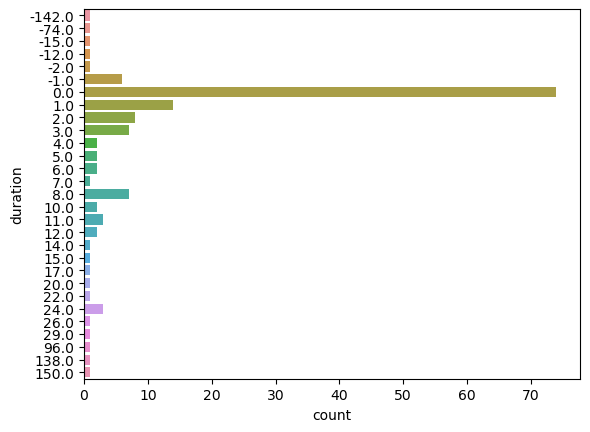

In [23]:
# Create a count plot of 'duration'
sns.countplot(y="duration", data=df)
plt.show()

- we can observe that most customer reviews had an early reply.
- the negative values which is immposibe to have a reply before the review

In [24]:
# Drop all negative duration values
new_df = df.drop(df[df["duration"]<0].index)

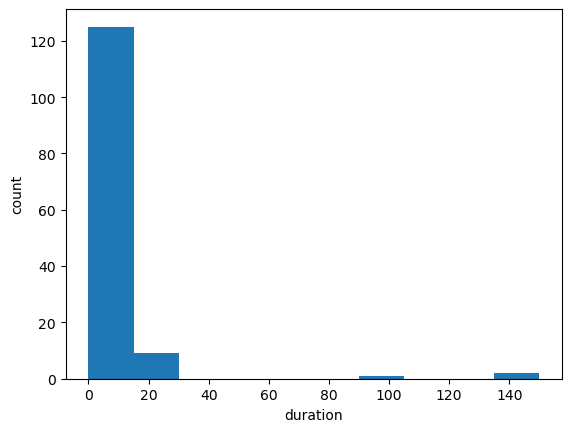

In [25]:
plt.hist(x="duration", data=new_df)
plt.ylabel("count")
plt.xlabel("duration")
plt.show()

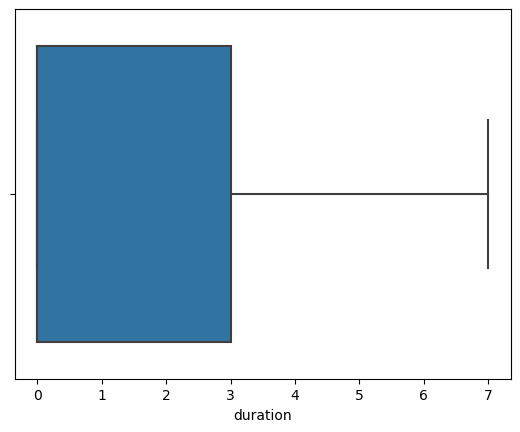

In [26]:
sns.boxplot(x="duration", data=new_df, sym="")
plt.show()

In [27]:
# What's the average time taken to respond
new_df["duration"].mean()

5.985401459854015

In [28]:
# what is the probability of getting an early reply (<=2 days)
expon.cdf(2, scale=6)

0.28346868942621073

* there is about a 30% chance of getting an early reply

Efforts should be made to improve quicker reponse to reviews

In [29]:
# Create a new feature of the the year each review was created
df["year"] = df["at"].dt.year

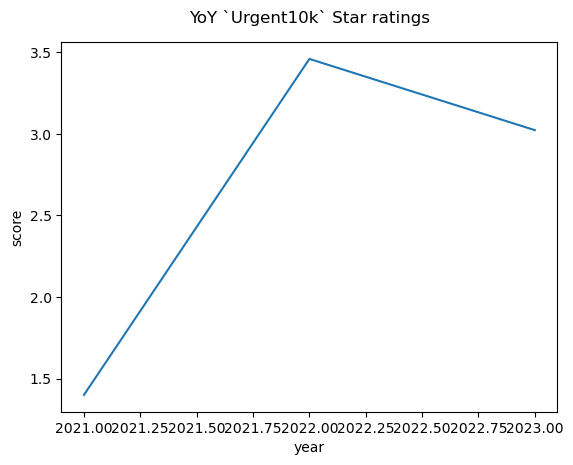

<Figure size 1500x2000 with 0 Axes>

In [30]:
# Create a line chart of score over time

g=sns.lineplot(x="year", y="score", data=df, ci=None)
plt.figure(figsize=(15, 20))
g.set_title("YoY `Urgent10k` Star ratings", y=1.03)
plt.show()

- there was a gradual raise in `urgent10k` app rating from 2021 to till mid 2022
- and a decline commenced from 2022 to 2023

More data will be required for further analysis

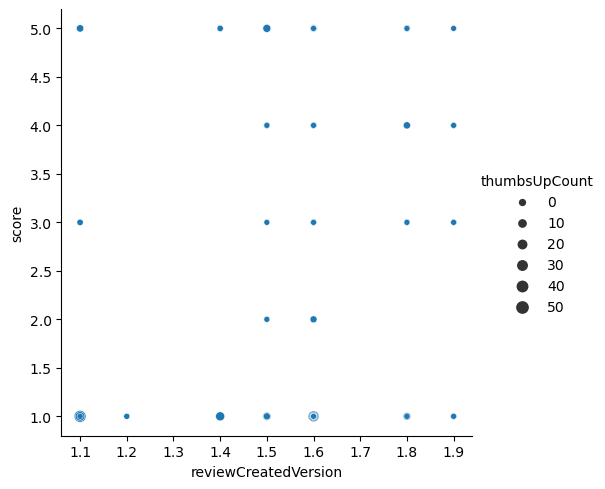

In [31]:
# Checking for correlation between star rating and app version
sns.relplot(x="reviewCreatedVersion", y="score", data=df, kind="scatter", size="thumbsUpCount")

In [32]:
df["score"].corr(df["reviewCreatedVersion"])

0.12987432982554348

- there is weak positive correlation of 0.13 between star rating and app version

<AxesSubplot:>

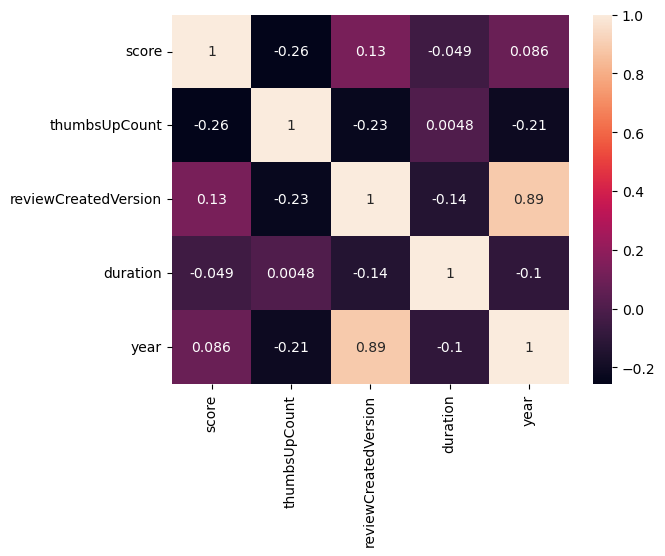

In [33]:
sns.heatmap(df.corr(), annot=True)

Here are some assumptions used:
* all `duration` greater than 2 days are considered as `late_reply`
* all `duration` less than equal to 2 days are considered as `early_reply`
* all NaN `repliedAt` are labeled `no_reply`

In [34]:
# Replies that took more than two days `late_reply`
df_filter = df[["userName", "reviews", "score", "replyContent", "at", "repliedAt","duration" ]]
late_reply = df_filter[df_filter["duration"]>2]
late_reply = late_reply.sort_values("duration", ascending=False)
late_reply.head()

,userName,reviews,score,replyContent,at,repliedAt,duration
214,Steve Tekome,Guys stay away from these confused entity.,1,"Hi, we'd like to understand the issue and help...",2022-03-11 22:03:29,2022-08-08 23:54:24,150.0
213,precious oseghe,This app na scam oh them go enter your account...,1,"Hi, can you please provide details so that we ...",2022-03-23 18:37:59,2022-08-08 23:54:09,138.0
209,Osuji Patrick,I cabt register and the number I was asked to ...,1,"Hi, please email us a screenshot of the error ...",2022-05-04 15:44:30,2022-08-08 23:53:45,96.0
207,Edeh Omon,Very good,5,"Thank you Edeh, we appreciate your comment.",2022-07-10 20:14:33,2022-08-08 23:53:16,29.0
206,Abdul Ahmed,Nice one.. It's gud and easy to access loan an...,5,Thank you for your encouraging words.,2022-07-13 16:58:12,2022-08-08 23:52:44,26.0


In [35]:
late_reply["duration"].median()

8.0

In [36]:
# number of late replies
late_replies = len(late_reply)
print(f"The number of late replies were:", late_replies)

The number of late replies were: 41


In [37]:
# number of reviews with no reply
no_reply = df["repliedAt"].isnull().sum()
print(f"The number of reviews that had no reply were:", no_reply)

The number of reviews that had no reply were: 93


In [38]:
# number of reviews with early reply
earl_reply = len(new_df[new_df["duration"]<=2])
earl_reply

96

In [39]:
# Create a diction of replies
replies = {
    "reply_type": ["early_reply", "late_reply", "no_reply"],
    "count": [96, 41, 93]
}

In [40]:
reply_df = pd.DataFrame(replies)
reply_df

,reply_type,count
0,early_reply,96
1,late_reply,41
2,no_reply,93


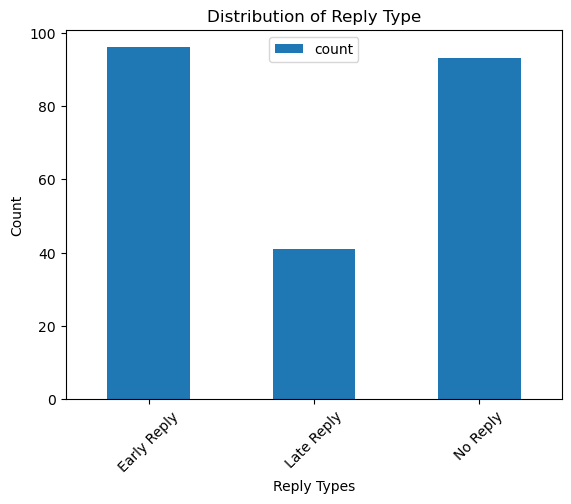

In [41]:
reply_df.plot(kind="bar")

# set custom x-axis tick labels
xtick_labels =["Early Reply", "Late Reply", "No Reply" ]
plt.gca().set_xticklabels(xtick_labels, rotation=45)

plt.title("Distribution of Reply Type")
plt.xlabel("Reply Types")
plt.ylabel("Count")
plt.show()